In [1]:
library(tidyverse)
library(RColorBrewer)
library(ArchR)
library(Seurat)
library(SingleCellExperiment)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \           

In [2]:
set.seed(1)
addArchRThreads(8)
addArchRGenome('hg38')


Setting default number of Parallel threads to 8.

Setting default genome to Hg38.



In [3]:
# Load Ni's previous ArchR project.
# See 20220513_archr_scATAC directory for documentation

proj = loadArchRProject(path="../20220513_archr_scATAC/scatac")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
proj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /lustre/scratch126/cellgen/team205/sk29/matthias_fb/20220513_archr_scATAC/scatac 
samples(13): A01 A02 ... A12 A13
sampleColData names(1): ArrowFiles
cellColData names(44): Sample TSSEnrichment ... Annot monoFragRatio
numberOfCells(1): 90664
medianTSS(1): 11.275
medianFrags(1): 11017

In [5]:
slotNames(proj)

[1] "projectMetadata"  "projectSummary"   "sampleColData"    "sampleMetadata"  
 [5] "cellColData"      "cellMetadata"     "reducedDims"      "embeddings"      
 [9] "peakSet"          "peakAnnotation"   "geneAnnotation"   "genomeAnnotation"
[13] "imputeWeights"

In [6]:
# Create new column with fibroblasts annotations only
proj@cellColData$annot_fibro = proj@cellColData$Annot
proj@cellColData$annot_fibro[!proj@cellColData$annot_fibro %in% c("MF1", "MF2", "PC", "S1", "S2", "S3", "S3x", "S4", "S5")] = NA
table(proj@cellColData$annot_fibro)


  MF1   MF2    PC    S1    S2    S3   S3x    S4    S5 
 5122   133  2190 20346  7786 19219  5302   920  5561 

In [7]:
gene_symbol = 'DKK3'

In [8]:
p = plotBrowserTrack(
    proj,
    #groupBy='Annot',
    groupBy='annot_fibro',
    geneSymbol=gene_symbol,
    #features=GRanges(markerList[['S5']]),
    upstream=50000,
    downstream=50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13ab1d99bcb7-Date-2024-10-17_Time-15-29-17.log
If there is an issue, please report to github with logFile!

2024-10-17 15:29:17 : Validating Region, 0.006 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]    chr11 11963106-12009769      - |       27122        DKK3
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 15:29:17 : Adding Bulk Tracks (1 of 1), 0.009 mins elapsed.

2024-10-17 15:31:09 : Adding Gene Tracks (1 of 1), 1.865 mins elapsed.

2024-10-17 15:31:09 : Plotting, 1.874 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13ab1d99bcb7-Date-2024-10-17_Time-15-29-17.log



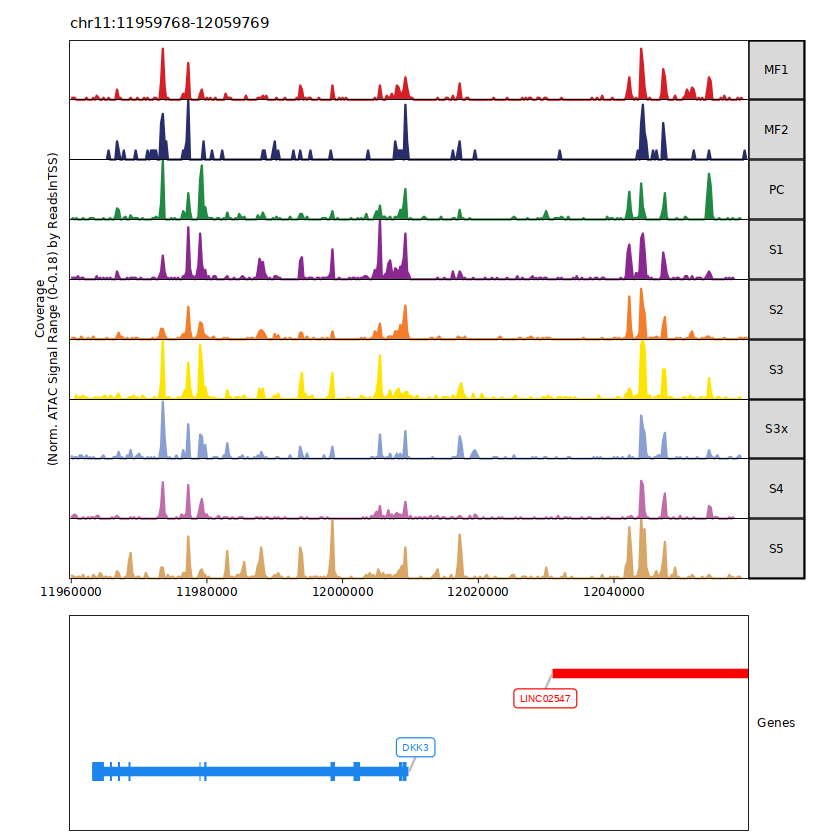

In [9]:
# Plot in Jupyter notebook
grid::grid.newpage()
grid::grid.draw(p[['DKK3']])

In [10]:
# Gets plotted in ArchR project directionr: ../20220513_archr_scATAC/scatac/Plots
plotPDF(plotList = p, 
    name = "Plot-Tracks-DKK3.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5)

Plotting Gtable!



NULL


In [122]:
#gene = "CXCL5"
#gene = "CXCL6"

#gene = "PDGFD"

gene = "MMP1"

# tab10 color palette
colors = c("#1f77b4",
           "#ff7f0e",
           "#2ca02c",
           "#d62728",
           "#9467bd",
           "#8c564b",
           "#e377c2",
           "#7f7f7f",
           "#bcbd22",
           "#17becf"
)

# Reorder colors to match color scheme
colors = colors[c(8, 9, 10, 1, 2, 3, 4, 6, 7)]

In [123]:
p = plotBrowserTrack(
    proj,
    groupBy='annot_fibro',
    geneSymbol=gene,
    #features=GRanges(markerList[['S5']]),
    upstream=50000,
    downstream=50000,
    pal=colors,
    sizes=c(8, 1.5, 1, 2)  # last one is bottom gene trac size
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13ab5f870bf5-Date-2024-10-17_Time-16-43-12.log
If there is an issue, please report to github with logFile!

2024-10-17 16:43:12 : Validating Region, 0.006 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]    chr11 102789920-102798160      - |        4312        MMP1
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 16:43:12 : Adding Bulk Tracks (1 of 1), 0.007 mins elapsed.

2024-10-17 16:43:18 : Adding Gene Tracks (1 of 1), 0.113 mins elapsed.

2024-10-17 16:43:19 : Plotting, 0.119 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13ab5f870bf5-Date-2024-10-17_Time-16-43-12.log



Plotting Gtable!



NULL


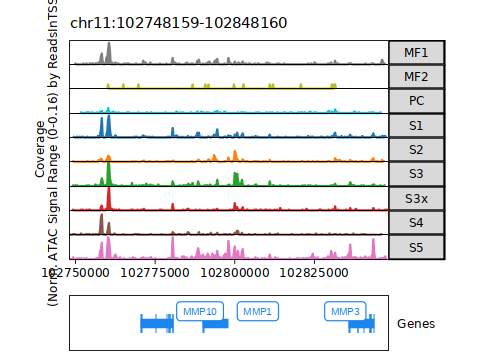

In [124]:
# Plot in Jupyter notebook
width=4; height=3
options(repr.plot.width=width, repr.plot.height=height)
grid::grid.newpage()
grid::grid.draw(p[[gene]])

# Gets plotted in ArchR project directionr: ../20220513_archr_scATAC/scatac/Plots
plotPDF(plotList = p, 
    name = paste0("Plot-Tracks-", gene, ".pdf"), 
    ArchRProj = proj, 
    addDOC = FALSE,
    width = width,
    height = height)

# Plot array of tracks

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13ab7b4b7c5f-Date-2024-10-17_Time-16-15-39.log
If there is an issue, please report to github with logFile!

2024-10-17 16:15:39 : Validating Region, 0.007 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]     chr4 73995642-73998779      - |        6374       CXCL5
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 16:15:39 : Adding Bulk Tracks (1 of 1), 0.008 mins elapsed.

2024-10-17 16:15:45 : Adding Gene Tracks (1 of 1), 0.095 mins elapsed.

2024-10-17 16:15:45 : Plotting, 0.101 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13ab7b4b7c5f-Date-2024-10-17_Time-16-15-39.log

Plotting Gtable!



NULL


ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13ab712a12cb-Date-2024-10-17_Time-16-15-48.log
If there is an issue, please report to github with logFile!

2024-10-17 16:15:49 : Validating Region, 0.007 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]    chr17 34319036-34321402      + |        6355        CCL8
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 16:15:49 : Adding Bulk Tracks (1 of 1), 0.008 mins elapsed.

2024-10-17 16:15:57 : Adding Gene Tracks (1 of 1), 0.155 mins elapsed.

2024-10-17 16:15:58 : Plotting, 0.162 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13ab712a12cb-Date-2024-10-17_Time-16-15-48.log

Plotting Gtable!



NULL


ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13ab5514f3d3-Date-2024-10-17_Time-16-16-01.log
If there is an issue, please report to github with logFile!

2024-10-17 16:16:02 : Validating Region, 0.007 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]    chr11 15966449-16738643      - |       55553        SOX6
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 16:16:02 : Adding Bulk Tracks (1 of 1), 0.008 mins elapsed.

2024-10-17 16:16:08 : Adding Gene Tracks (1 of 1), 0.115 mins elapsed.

2024-10-17 16:16:09 : Plotting, 0.122 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13ab5514f3d3-Date-2024-10-17_Time-16-16-01.log



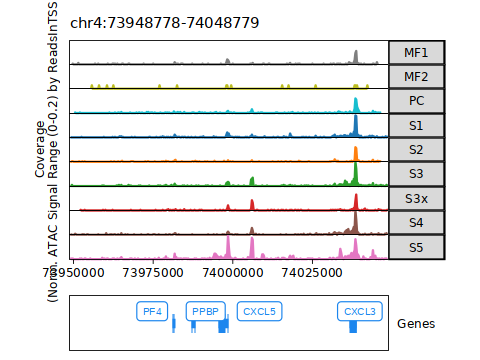

Plotting Gtable!



NULL


ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13ab2dcee52c-Date-2024-10-17_Time-16-16-13.log
If there is an issue, please report to github with logFile!

2024-10-17 16:16:13 : Validating Region, 0.007 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]    chr19 15159038-15200981      - |        4854      NOTCH3
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 16:16:13 : Adding Bulk Tracks (1 of 1), 0.009 mins elapsed.

2024-10-17 16:16:23 : Adding Gene Tracks (1 of 1), 0.166 mins elapsed.

2024-10-17 16:16:23 : Plotting, 0.173 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13ab2dcee52c-Date-2024-10-17_Time-16-16-13.log



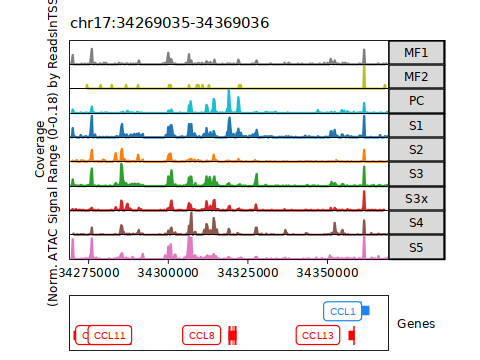

Plotting Gtable!



NULL


ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13ab5b27f5f8-Date-2024-10-17_Time-16-16-27.log
If there is an issue, please report to github with logFile!

2024-10-17 16:16:27 : Validating Region, 0.007 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr4 144646021-144745271      + |       64399        HHIP
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 16:16:27 : Adding Bulk Tracks (1 of 1), 0.009 mins elapsed.

2024-10-17 16:16:32 : Adding Gene Tracks (1 of 1), 0.093 mins elapsed.

2024-10-17 16:16:33 : Plotting, 0.101 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13ab5b27f5f8-Date-2024-10-17_Time-16-16-27.log



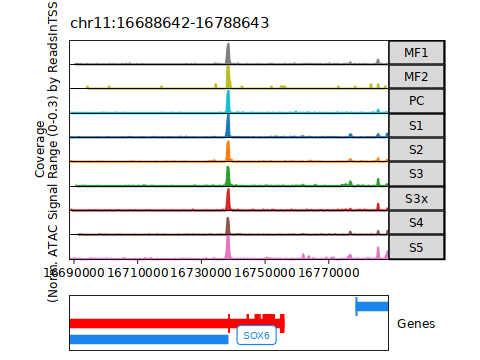

Plotting Gtable!



NULL


ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13ab5301727f-Date-2024-10-17_Time-16-16-36.log
If there is an issue, please report to github with logFile!

2024-10-17 16:16:37 : Validating Region, 0.006 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr2 219418377-219426739      + |        1674         DES
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 16:16:37 : Adding Bulk Tracks (1 of 1), 0.008 mins elapsed.

2024-10-17 16:17:09 : Adding Gene Tracks (1 of 1), 0.543 mins elapsed.

2024-10-17 16:17:09 : Plotting, 0.55 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13ab5301727f-Date-2024-10-17_Time-16-16-36.log



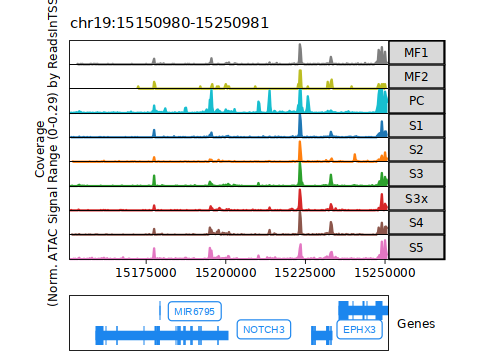

Plotting Gtable!



NULL


ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13ab36a99a24-Date-2024-10-17_Time-16-17-13.log
If there is an issue, please report to github with logFile!

2024-10-17 16:17:14 : Validating Region, 0.007 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]     chr9 34689567-34691277      - |        6363       CCL19
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 16:17:14 : Adding Bulk Tracks (1 of 1), 0.008 mins elapsed.

2024-10-17 16:17:43 : Adding Gene Tracks (1 of 1), 0.493 mins elapsed.

2024-10-17 16:17:43 : Plotting, 0.5 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13ab36a99a24-Date-2024-10-17_Time-16-17-13.log



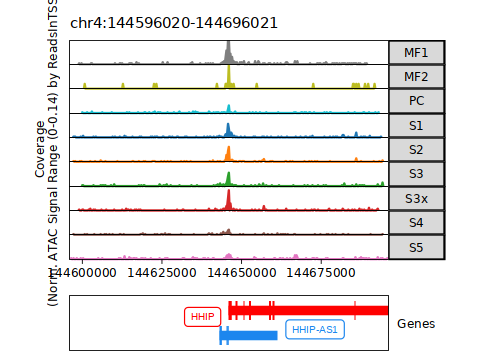

Plotting Gtable!



NULL


ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13ab272cb875-Date-2024-10-17_Time-16-17-47.log
If there is an issue, please report to github with logFile!

2024-10-17 16:17:48 : Validating Region, 0.007 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]    chr12 102395867-102480645      - |        3479        IGF1
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 16:17:48 : Adding Bulk Tracks (1 of 1), 0.008 mins elapsed.

2024-10-17 16:18:27 : Adding Gene Tracks (1 of 1), 0.671 mins elapsed.

2024-10-17 16:18:28 : Plotting, 0.678 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13ab272cb875-Date-2024-10-17_Time-16-17-47.log



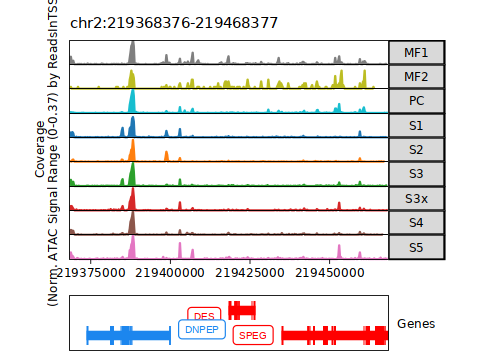

Plotting Gtable!



NULL


ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-13abcd4044e-Date-2024-10-17_Time-16-18-31.log
If there is an issue, please report to github with logFile!

2024-10-17 16:18:32 : Validating Region, 0.006 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]     chr6 36948263-36964837      + |      221476        PI16
  -------
  seqinfo: 24 sequences from hg38 genome


2024-10-17 16:18:32 : Adding Bulk Tracks (1 of 1), 0.008 mins elapsed.

2024-10-17 16:19:13 : Adding Gene Tracks (1 of 1), 0.695 mins elapsed.

2024-10-17 16:19:14 : Plotting, 0.702 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-13abcd4044e-Date-2024-10-17_Time-16-18-31.log



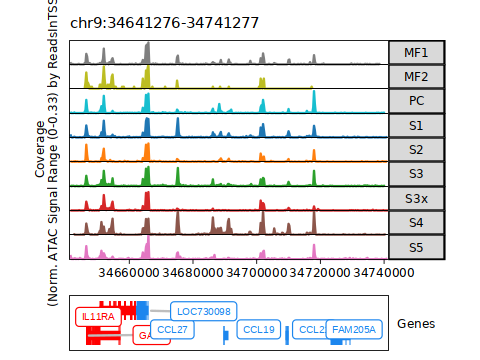

Plotting Gtable!



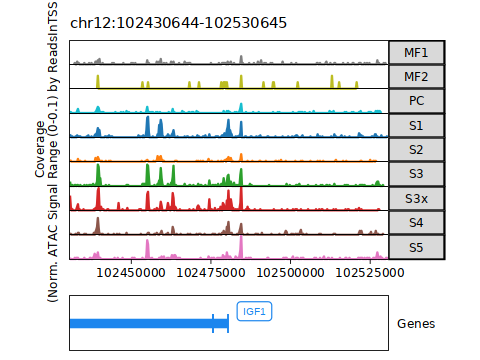

NULL


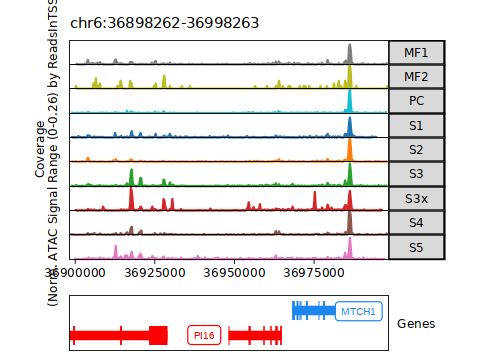

In [115]:
genes = c("CXCL5", "CCL8", "SOX6", "NOTCH3", "HHIP", "DES", "CCL19", "IGF1", "PI16")

for (gene in genes) {
    
    p = plotBrowserTrack(
        proj,
        groupBy='annot_fibro',
        geneSymbol=gene,
        #features=GRanges(markerList[['S5']]),
        upstream=50000,
        downstream=50000,
        pal=colors,
        sizes=c(8, 1.5, 1, 2)  # last one is bottom gene trac size
    )
    
    # Plot in Jupyter notebook
    width=4; height=3
    options(repr.plot.width=width, repr.plot.height=height)
    grid::grid.newpage()
    grid::grid.draw(p[[gene]])

    # Gets plotted in ArchR project directionr: ../20220513_archr_scATAC/scatac/Plots
    plotPDF(plotList = p, 
        name = paste0("Plot-Tracks-", gene, ".pdf"), 
        ArchRProj = proj, 
        addDOC = FALSE,
        width = width,
        height = height)
}